# Tarea: Diseño de gráficos para datos tabulares y distribuciones con Python

## Jason Sepulveda

### Instrucciones

1. Antes de comenzar, debes haber revisado las clases correspondientes a la semana 4 del curso, Gráficos para distribuciones: histograma, densidad, caja y violín y Múltiples ejes, radial y torta, además de la lectura y tutoriales de la semana.

2. Descarga el dataset “Diabetes_Tarea2.csv”, que consiste en mediciones a pacientes, donde la columna "Outcome" corresponde a si el paciente tiene o no diabetes.

3. Luego, genera las siguientes visualizaciones, que deben poseer título, los ejes deben estar correctamente rotulados y deben tener leyenda:

* a. Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.

* b. Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).

* c. Dos diagramas de violín con las mismas separaciones anteriores, esta vez mostrando los datos de insulina y espesor de la piel.

* d. Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.

* e. Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes.      

4. Una vez finalizada la actividad, guarda el archivo con extensión .ipynb, con el nombre “Tarea 2_Nombre y Apellidos” y súbelo a la plataforma de acuerdo a las siguientes instrucciones:

* Haz clic en el botón para agregar entrega. Se abrirá una nueva ventana que permite arrastrar el archivo y subirlo.

* Comprueba que el archivo arrastrado es el correcto y presiona el botón para guardar cambios. El documento quedará guardado en la plataforma.

¡Mucho éxito!

In [2]:
# Import libraries

# Course
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Other
import plotly.express as px
from pathlib import Path

# path management
from utils.paths import DATA_RAW_DIR

In [3]:
# path

path_diabetes = DATA_RAW_DIR / "w4_Diabetes_Tarea2.csv"
print(Path(path_diabetes).exists())

True


In [4]:
# Load data

df_diabetes = pd.read_csv(path_diabetes, sep=",", encoding="utf-8")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df_diabetes.shape

(768, 9)

In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


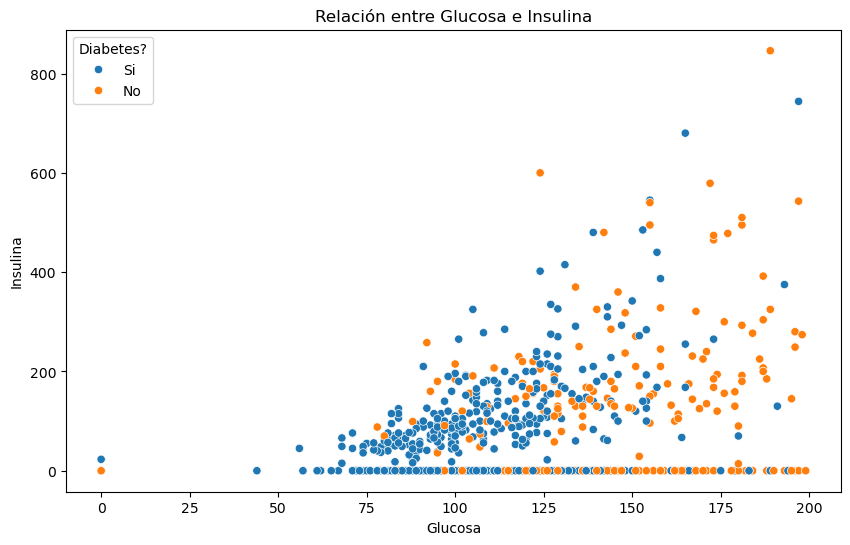

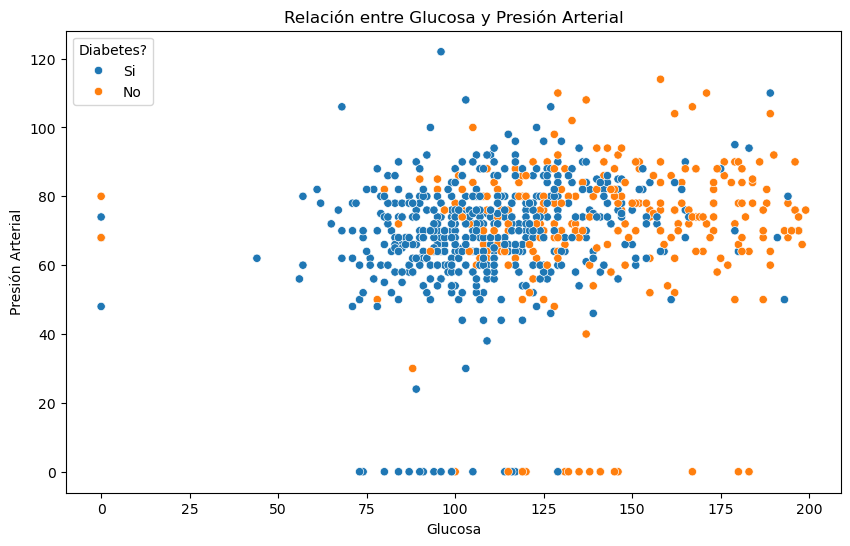

In [8]:
# Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_diabetes,
                x="Glucose",
                y="Insulin",
                hue="Outcome",
                ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Glucosa e Insulina")
plt.xlabel("Glucosa")
plt.ylabel("Insulina")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_diabetes,
                x="Glucose",
                y="BloodPressure",
                hue="Outcome",
                ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Glucosa y Presión Arterial")
plt.xlabel("Glucosa")
plt.ylabel("Presión Arterial")
plt.show()

In [9]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

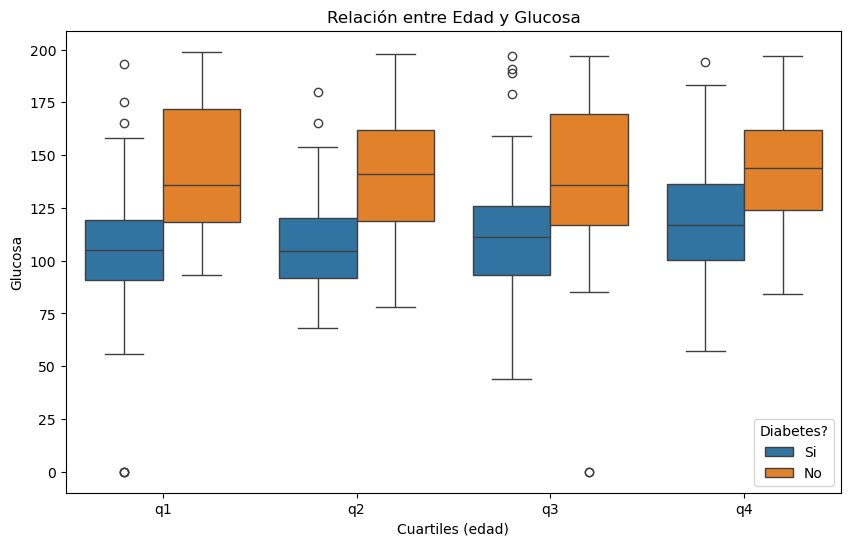

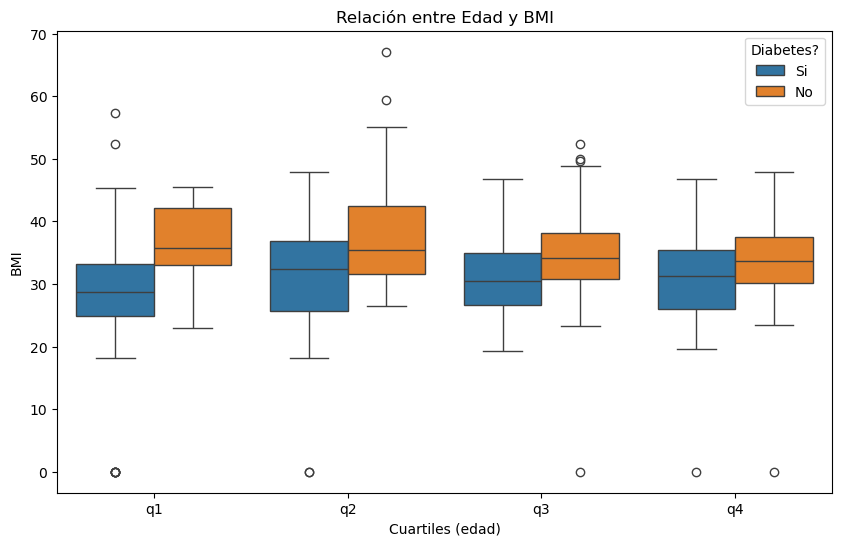

In [10]:
# b. Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).

df_diabetes['Age_quartiles'] = pd.qcut(df_diabetes['Age'], q=4, labels = ["q1", "q2", "q3", "q4"])

# Glucose
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_diabetes,
            x="Age_quartiles",
            y="Glucose",
            hue="Outcome",
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Edad y Glucosa")
plt.xlabel("Cuartiles (edad)")
plt.ylabel("Glucosa")
plt.show()

# BMI
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_diabetes,
            x="Age_quartiles",
            y="BMI",
            hue="Outcome",
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Edad y BMI")
plt.xlabel("Cuartiles (edad)")
plt.ylabel("BMI")
plt.show()



In [11]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_quartiles'],
      dtype='object')

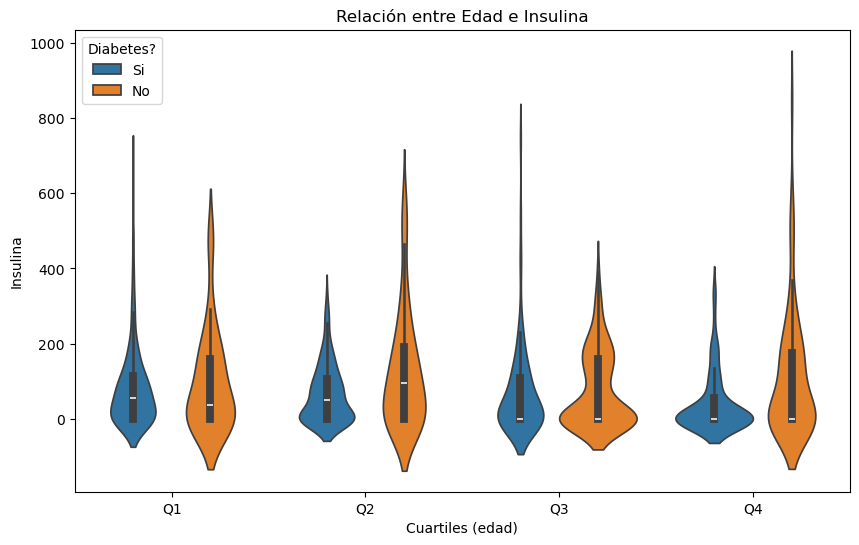

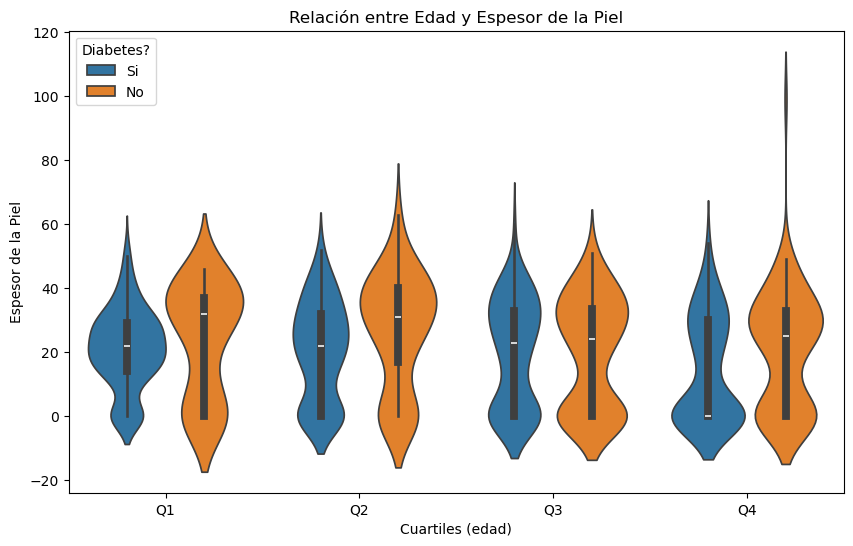

In [12]:
# c. Dos diagramas de violín con las mismas separaciones anteriores, esta vez mostrando los datos de insulina y espesor de la piel.

df_diabetes['Age_quartiles'] = pd.qcut(df_diabetes['Age'], q=4, labels = ["Q1", "Q2", "Q3", "Q4"])

# Insuline
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_diabetes,
            x="Age_quartiles",
            y="Insulin",
            hue="Outcome",
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Edad e Insulina")
plt.xlabel("Cuartiles (edad)")
plt.ylabel("Insulina")
plt.show()

# SkinThickness
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_diabetes,
            x="Age_quartiles",
            y="SkinThickness",
            hue="Outcome",
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Si", "No"]
ax.legend(handles=handles, labels=new_labels, title="Diabetes?")

plt.title("Relación entre Edad y Espesor de la Piel")
plt.xlabel("Cuartiles (edad)")
plt.ylabel("Espesor de la Piel")
plt.show()



In [13]:
print(df_diabetes['Age'].min())
print(df_diabetes['Age'].max())

21
81


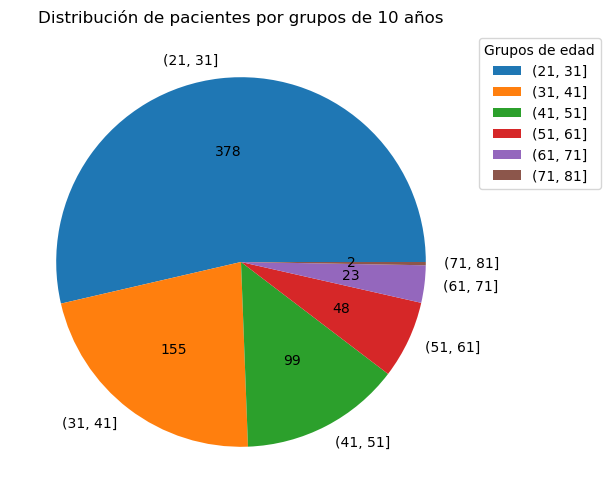

In [14]:
# d. Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.

bins = range(21, df_diabetes["Age"].max()+10, 10)
df_diabetes['Age_groups'] = pd.cut(df_diabetes['Age'], bins=bins)
age_group_counts = df_diabetes['Age_groups'].value_counts()

fig = plt.figure(figsize=(6, 6))
plot = fig.add_subplot()

pie_plot = plot.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct=lambda x: "{:.0f}".format(x * (age_group_counts.sum() / 100)))

plot.legend(pie_plot[0], age_group_counts.index, title="Grupos de edad", bbox_to_anchor=(1, 1))

plt.title('Distribución de pacientes por grupos de 10 años')
plt.show()

In [15]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_quartiles',
       'Age_groups'],
      dtype='object')

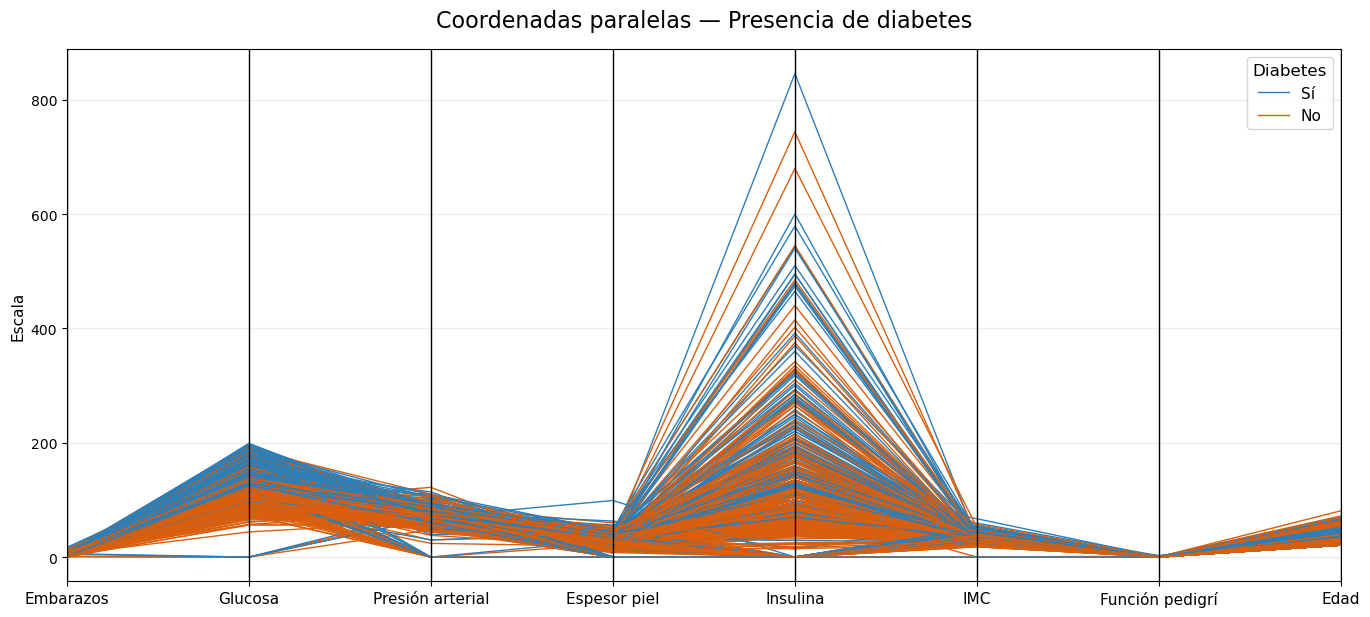

In [16]:
# e. Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes. 

col_rename = {
    "Pregnancies": "Embarazos",
    "Glucose": "Glucosa",
    "BloodPressure": "Presión arterial",
    "SkinThickness": "Espesor piel",
    "Insulin": "Insulina",
    "BMI": "IMC",
    "DiabetesPedigreeFunction": "Función pedigrí",
    "Age": "Edad"
}

df_plot = df_diabetes.copy()
df_plot["Diabetes"] = df_plot["Outcome"].map({0: "No", 1: "Sí"})

df_plot = df_plot.rename(columns=col_rename)

cols_es = list(col_rename.values())

df_plot = df_plot[["Diabetes"] + cols_es]

fig, ax = plt.subplots(figsize=(14, 7))

parallel_coordinates(
    df_plot,
    class_column="Diabetes",
    cols=cols_es,
    color=["#2c7fb8", "#d95f0e"],
    linewidth=1.0,
    ax=ax
)

ax.set_title("Coordenadas paralelas — Presencia de diabetes", fontsize=16, pad=16)
ax.set_ylabel("Escala", fontsize=11)
ax.grid(True, alpha=0.25)

for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_fontsize(11)

leg = ax.legend(title="Diabetes", fontsize=11, title_fontsize=12, loc="upper right")
plt.subplots_adjust(top=0.88, left=0.07, right=0.98, bottom=0.12)

plt.show()